# Perform Principal component analysis
# perform heirarchial and k mean clustering (scree plot or elbow curve) using first 3 principal component scores 
# obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data

## Exploratory Data Analysis

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# To supress warnings
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# loading the dataset
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


178 samples, 14 features, no na values

In [5]:
# Types of wine
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

The data is already labelled in the feature Type. Hence, we will drop it for clustering and PCA

In [6]:
# storing original labels
org_label = df.Type

In [7]:
# removing Type feature
df_unlabelled = df.drop(columns = ['Type'])

In [8]:
# checking unique values for each feature out of maximum of 178
df_unlabelled.nunique()

Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [9]:
# getting basic statistics for the data
df_unlabelled.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


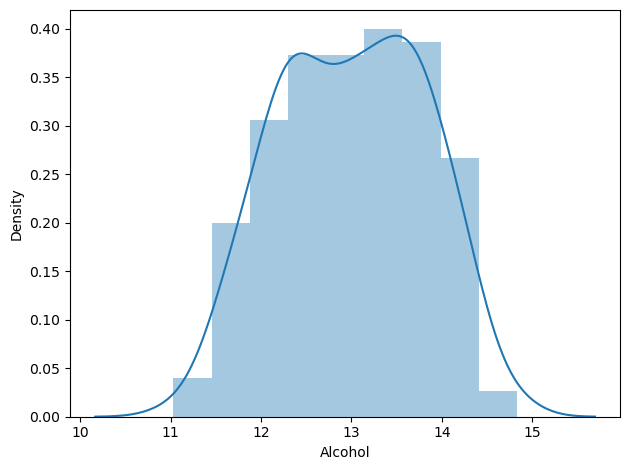

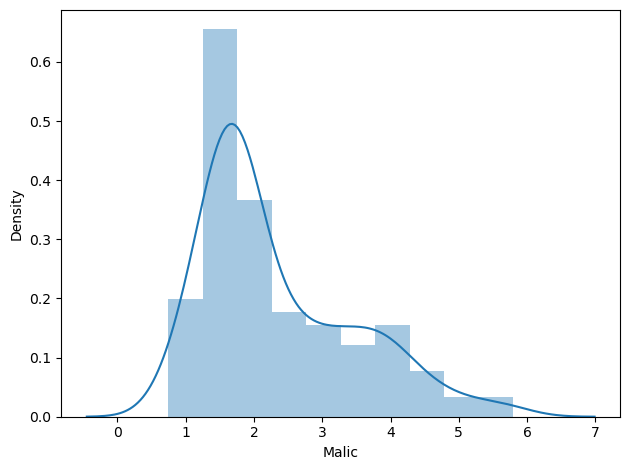

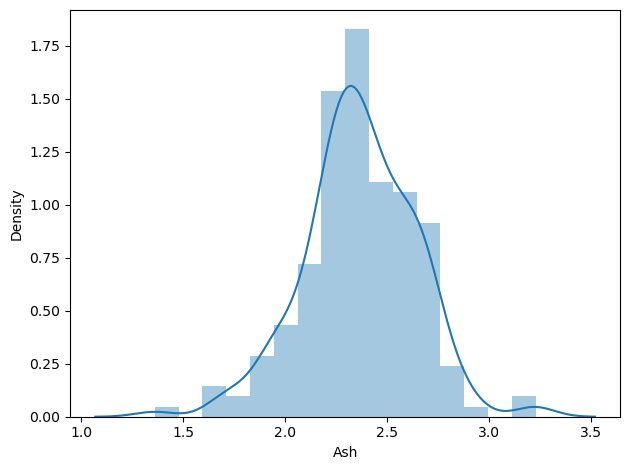

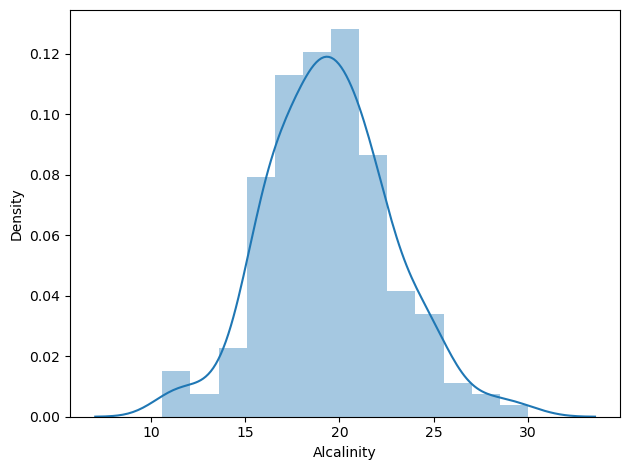

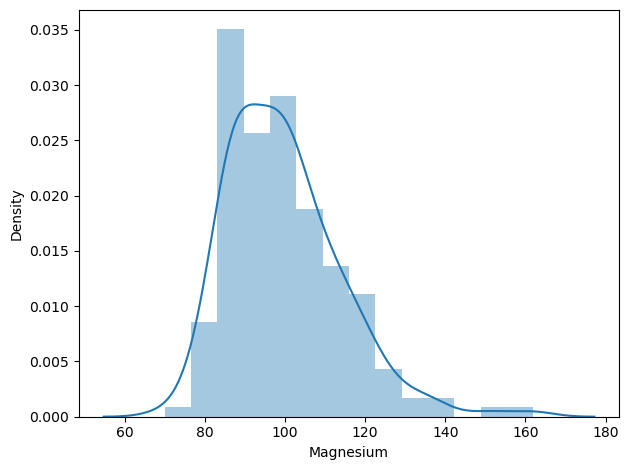

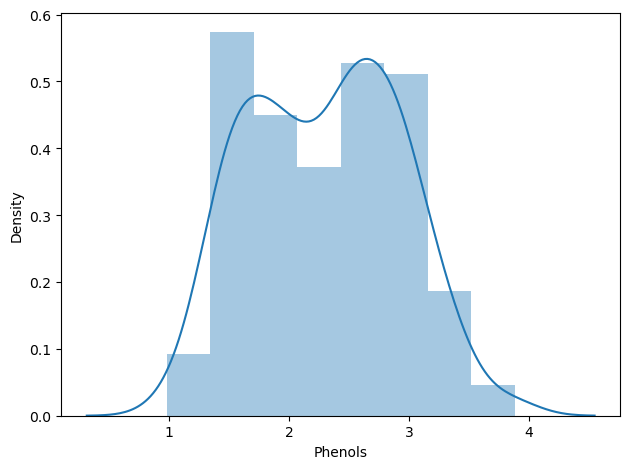

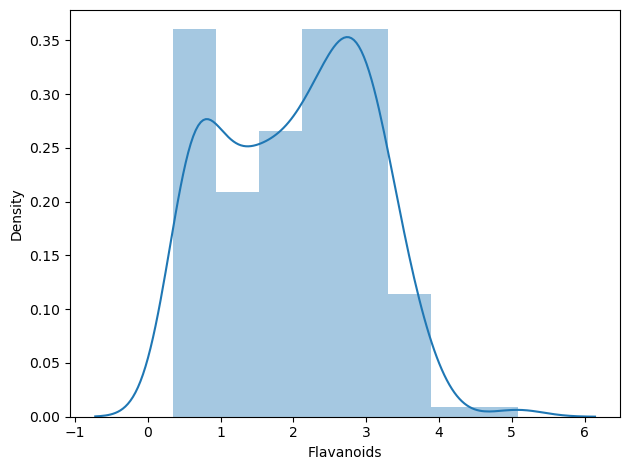

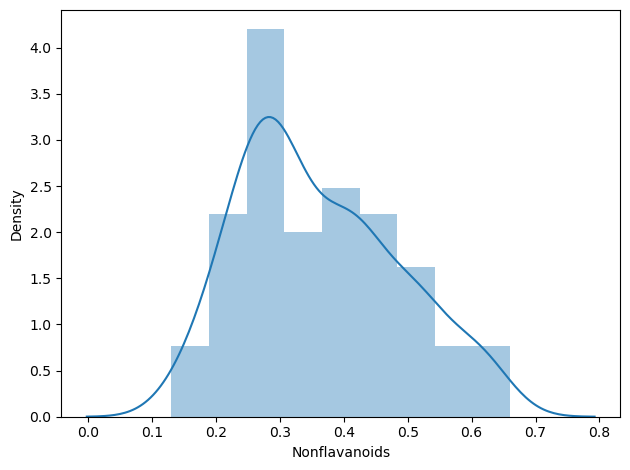

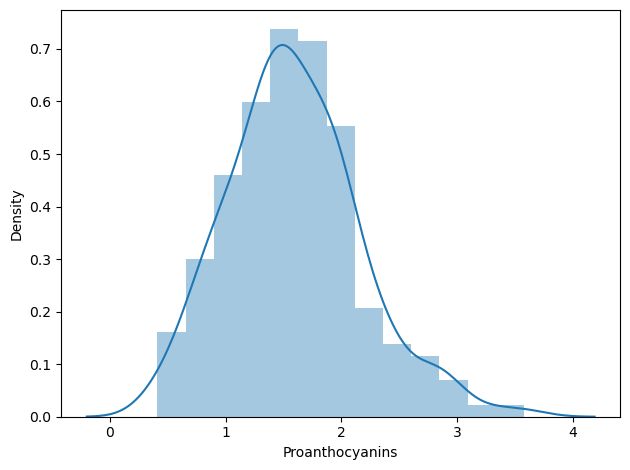

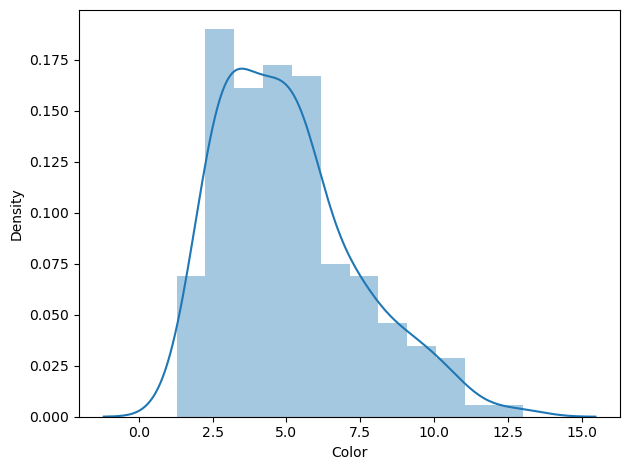

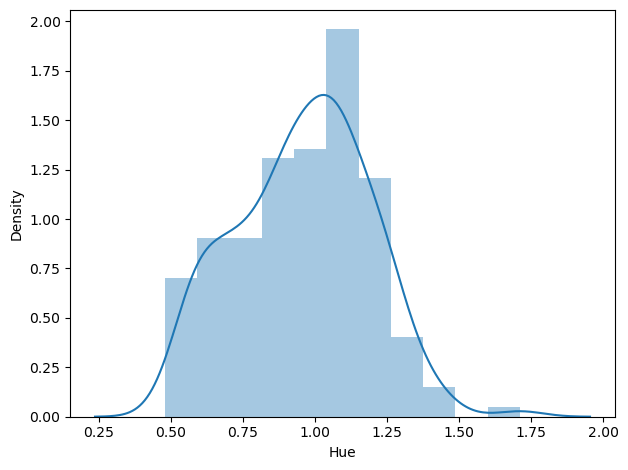

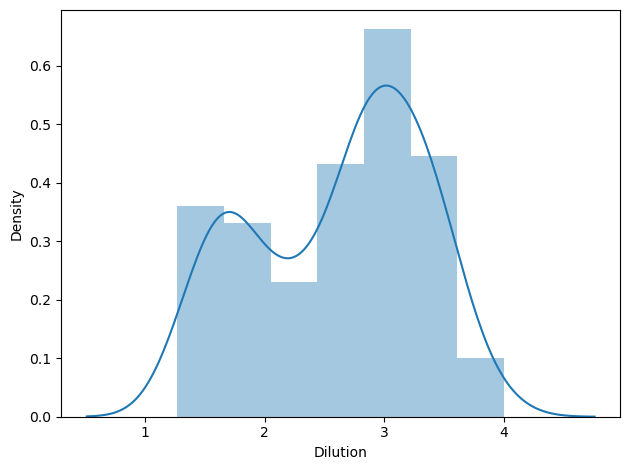

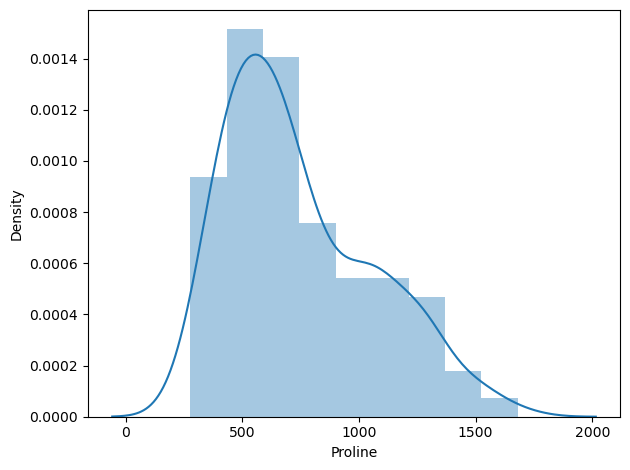

In [10]:
# plotting distribution for each feature
for column in df_unlabelled.columns:
    sns.distplot(df_unlabelled[column])
    plt.tight_layout()
    plt.show()

All features have different scales

## Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# standardizing the data
df_std = pd.DataFrame(StandardScaler().fit_transform(df_unlabelled), columns = df_unlabelled.columns)
# normalizing the data
df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_unlabelled), columns = df_unlabelled.columns)

## Working with Standardized Data

In [12]:
from sklearn.decomposition import PCA

In [13]:
# Applying Principal Component Analysis to standardized data
pca = PCA()
pca.fit(df_std)

PCA()

<Axes: >

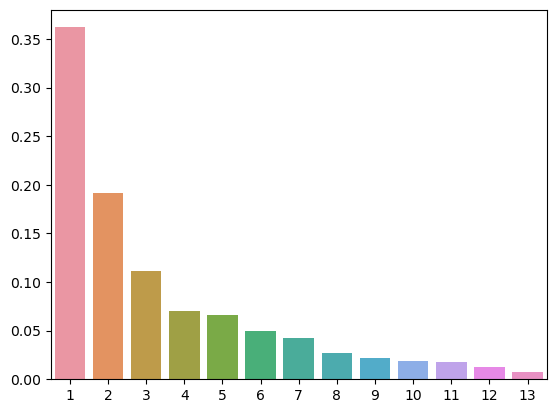

In [14]:
# barplot of explained variance of each principal components
sns.barplot(x = list(range(1,pca.n_components_+1)), y = pca.explained_variance_ratio_)

In [15]:
# total variance explained by the first 3 principal components
pca.explained_variance_ratio_[:3].sum()

0.6652996889318528

The first 3 components explain 2/3rds of the total variance in the data

However, we will only be using the first 3 components

In [16]:
# Creating a data frame of first 3 principal components
pca = PCA(n_components=3)
df_pc = pd.DataFrame(pca.fit_transform(df_std), columns = ['PC1', 'PC2', 'PC3'])

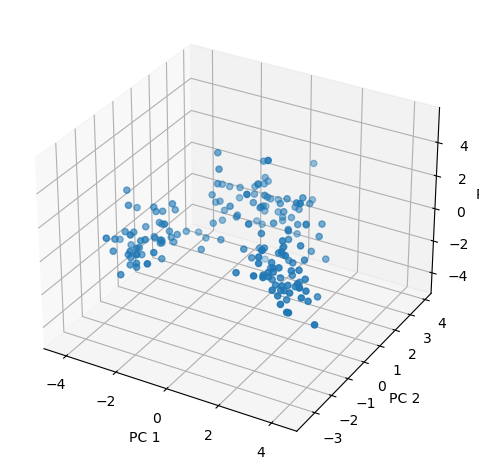

In [17]:
# scatterplot for the three components
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_pc.PC1, df_pc.PC2, df_pc.PC3)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
fig.tight_layout()

### Agglomerative Clustering

In [18]:
# finding the optimal number of clusters using silhouette score for ward linkage
for i in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(df_pc)
    clabel = agg.labels_
    print(f"For {i} clusters, Silhouette Score is {silhouette_score(df_pc, clabel)}")

For 2 clusters, Silhouette Score is 0.39509037225075383
For 3 clusters, Silhouette Score is 0.44594921980629687
For 4 clusters, Silhouette Score is 0.38195690348144407
For 5 clusters, Silhouette Score is 0.31948816174663447
For 6 clusters, Silhouette Score is 0.31993269879897357
For 7 clusters, Silhouette Score is 0.2890224763575289
For 8 clusters, Silhouette Score is 0.26712344783971087
For 9 clusters, Silhouette Score is 0.2748937706836064
For 10 clusters, Silhouette Score is 0.2812809411068862


3 clusters give the optimal silhouette score

In [19]:
# fitting the model for optimal number of clusters for ward linkage
agg = AgglomerativeClustering(n_clusters=3)
clabel = pd.DataFrame(agg.fit_predict(df_pc), columns = ['clabel'])
df_pc_labelled = pd.concat([df_pc, clabel], axis = 1)

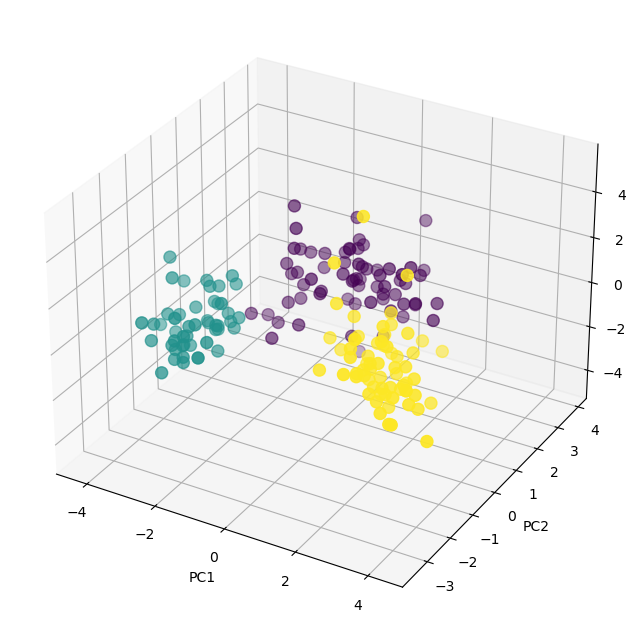

In [20]:
# Create 3D scatterplot of the labelled data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(df_pc_labelled.PC1, df_pc_labelled.PC2, df_pc_labelled.PC3, c=df_pc_labelled.clabel, cmap="viridis", s=75)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [21]:
# The Fowlkes-Mallows score is defined as the geometric mean of the pairwise precision and recall. 
# The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

from sklearn.metrics import fowlkes_mallows_score, confusion_matrix

true_label = np.array(org_label).reshape(-1)
pred_label = np.array(clabel).reshape(-1)
fms = fowlkes_mallows_score(true_label, pred_label)
print(f"The Fowlkes Mallows Score is {fms}")

The Fowlkes Mallows Score is 0.8989664816705096


The high score indicate that there are very few misclusterings

In [22]:
# finding the optimal number of clusters using silhouette score for all metrics and linkages except ward linkage
best_sil = 0
for i in range(2, 11):
    for linkage in ['single','complete','average']:
        for metric in ['euclidean', 'manhattan', 'cosine']:
            agg = AgglomerativeClustering(n_clusters=i, metric = metric, linkage = linkage)
            agg.fit(df_pc)
            clabel = agg.labels_
            sil_score = silhouette_score(df_pc, clabel)
            if sil_score > best_sil:
                best_sil = sil_score
                best_metric = metric
                best_linkage = linkage
                best_n_clusters = i
print(f"Best Silhouette Score of {best_sil} is for {i} clusters with {linkage} linkage and {metric} metric.")

Best Silhouette Score of 0.4465449278023583 is for 10 clusters with average linkage and cosine metric.


In [23]:
# fitting model for hyper parameters with the best silhouette scores
agg = AgglomerativeClustering(n_clusters=10, metric = 'cosine', linkage = 'average')
clabel = pd.DataFrame(agg.fit_predict(df_pc), columns = ['clabel'])
df_pc_labelled = pd.concat([df_pc, clabel], axis = 1)

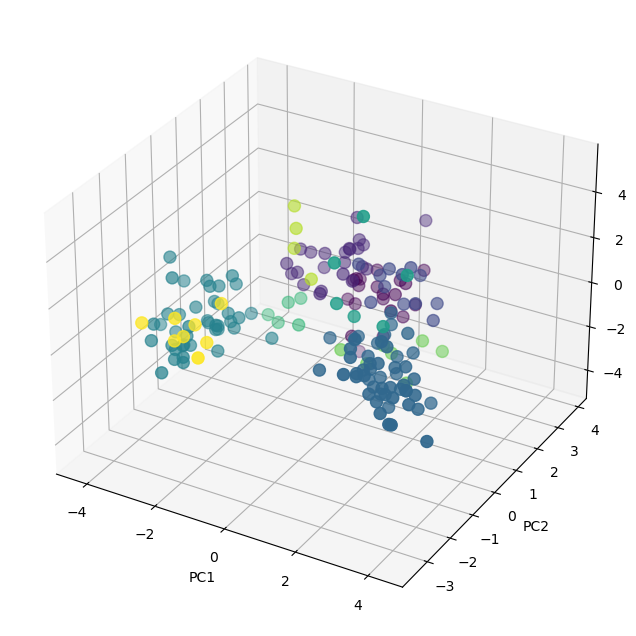

In [24]:
# Create 3D scatterplot of the labelled data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(df_pc_labelled.PC1, df_pc_labelled.PC2, df_pc_labelled.PC3, c=df_pc_labelled.clabel, cmap="viridis", s=75)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [25]:
# getting the Fowlkes-Mallows score
pred_label = np.array(clabel).reshape(-1)
fms = fowlkes_mallows_score(true_label, pred_label)
print(f"The Fowlkes Mallows Score is {fms}")

The Fowlkes Mallows Score is 0.6876479331334036


The low score indicates that there has been a lot of misclustering

### KMeans Clustering

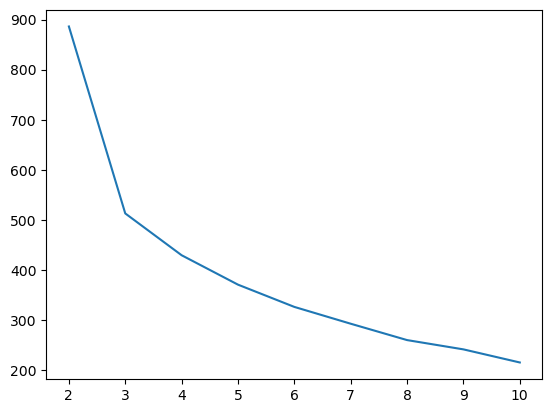

In [26]:
# Using Elbow method to determine optimal number of clusters
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pc)
    wcss.append(kmeans.inertia_)
plt.plot(list(range(2,11)), wcss)

The elbow is at 3

In [27]:
# finding the optimal number of clusters using silhouette score
for i in range(2, 11):
    agg = KMeans(n_clusters=i)
    agg.fit(df_pc)
    clabel = agg.labels_
    print(f"For {i} clusters, Silhouette Score is {silhouette_score(df_pc, clabel)}")

For 2 clusters, Silhouette Score is 0.38938813089003316
For 3 clusters, Silhouette Score is 0.4532351215683952
For 4 clusters, Silhouette Score is 0.41102968197688594
For 5 clusters, Silhouette Score is 0.3943315779755933
For 6 clusters, Silhouette Score is 0.3094331795257093
For 7 clusters, Silhouette Score is 0.30327384470491636
For 8 clusters, Silhouette Score is 0.2827459782444185
For 9 clusters, Silhouette Score is 0.2922339107219323
For 10 clusters, Silhouette Score is 0.3051565866095886


3 clusters has the best silhouette score

In [28]:
# fitting the model
kmeans = KMeans(n_clusters=3)
clabel = pd.DataFrame(kmeans.fit_predict(df_pc), columns = ['clabel'])
df_pc_labelled = pd.concat([df_pc, clabel], axis = 1)

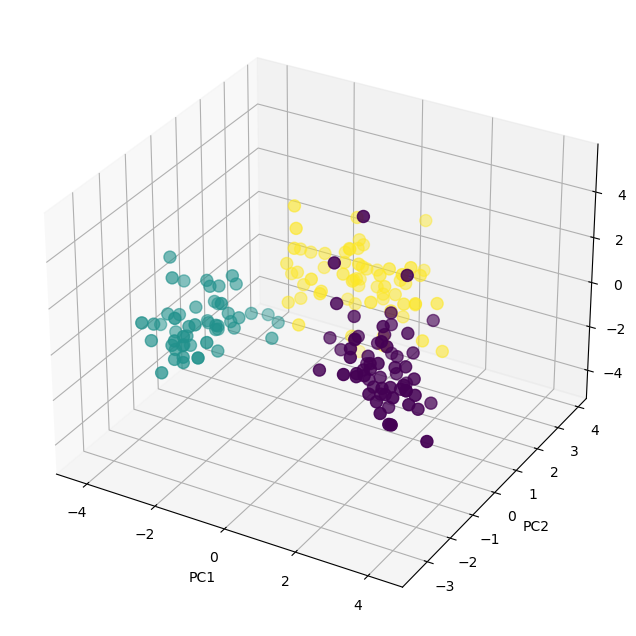

In [29]:
# Create 3D scatterplot of the labelled data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(df_pc_labelled.PC1, df_pc_labelled.PC2, df_pc_labelled.PC3, c=df_pc_labelled.clabel, cmap="viridis", s=75)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [30]:
# getting the Fowlkes-Mallows score
pred_label = np.array(clabel).reshape(-1)
fms = fowlkes_mallows_score(true_label, pred_label)
print(f"The Fowlkes Mallows Score is {fms}")

The Fowlkes Mallows Score is 0.9205411378393452


The high score indicate that there have been very few misclusterings from the original labels

## Working with Normalized Data

In [31]:
# Getting Principal Component Analysis for Normalized Data
pca = PCA()
pca.fit(df_norm)

PCA()

<Axes: >

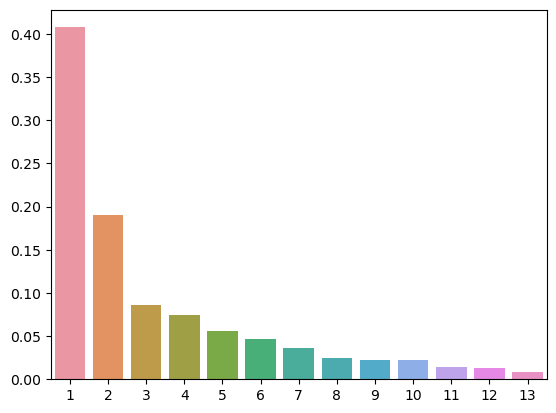

In [32]:
# barplot of explained variance of each principal component
sns.barplot(x = list(range(1,pca.n_components_+1)), y = pca.explained_variance_ratio_)

In [33]:
# total variance explained by the first 3 principal components
pca.explained_variance_ratio_[:3].sum()

0.6828150695968221

The first 3 components explain a little more than 2/3rds of the total variance in the data

However, we will only be using the first 3 components

In [34]:
# Creating a data frame of first 3 principal components
pca = PCA(n_components=3)
df_pc = pd.DataFrame(pca.fit_transform(df_norm), columns = ['PC1', 'PC2', 'PC3'])

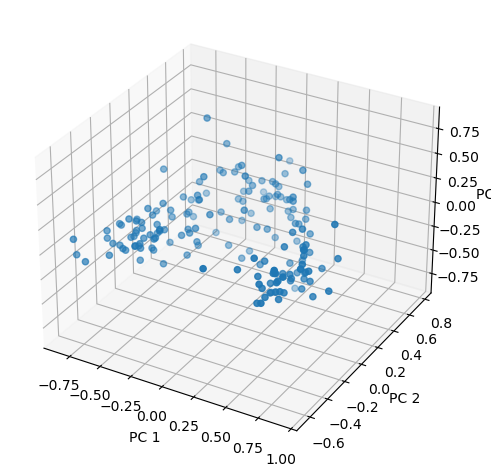

In [35]:
# scatterplot for the three components
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_pc.PC1, df_pc.PC2, df_pc.PC3)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
fig.tight_layout()

### Agglomerative Clustering

In [36]:
# finding the optimal number of clusters using silhouette score for ward linkage
for i in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(df_pc)
    clabel = agg.labels_
    print(f"For {i} clusters, Silhouette Score is {silhouette_score(df_pc, clabel)}")

For 2 clusters, Silhouette Score is 0.42761758661440263
For 3 clusters, Silhouette Score is 0.4596281708499888
For 4 clusters, Silhouette Score is 0.4238127562733951
For 5 clusters, Silhouette Score is 0.35873607298930177
For 6 clusters, Silhouette Score is 0.3199906750079663
For 7 clusters, Silhouette Score is 0.3202425497240873
For 8 clusters, Silhouette Score is 0.25278985240384183
For 9 clusters, Silhouette Score is 0.2682274770871767
For 10 clusters, Silhouette Score is 0.2669392153594844


3 clusters give the optimal silhouette score

In [37]:
# fitting model for 3 clusters for ward linkage
agg = AgglomerativeClustering(n_clusters=3)
clabel = pd.DataFrame(agg.fit_predict(df_pc), columns = ['clabel'])
df_pc_labelled = pd.concat([df_pc, clabel], axis = 1)

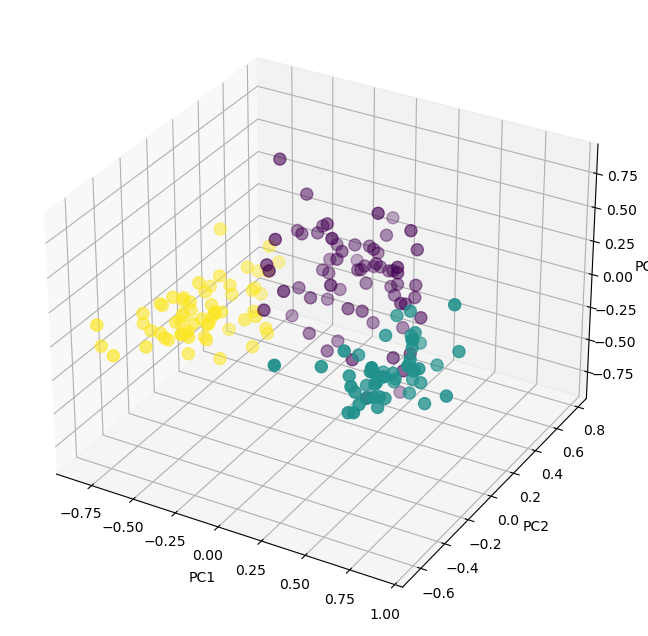

In [38]:
# Create 3D scatterplot of the labelled data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(df_pc_labelled.PC1, df_pc_labelled.PC2, df_pc_labelled.PC3, c=df_pc_labelled.clabel, cmap="viridis", s=75)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [39]:
# getting the Fowlkes-Mallows score
pred_label = np.array(clabel).reshape(-1)
fms = fowlkes_mallows_score(true_label, pred_label)
print(f"The Fowlkes Mallows Score is {fms}")

The Fowlkes Mallows Score is 0.8361673321644643


The average score indicate that there are some misclusterings

In [40]:
# finding the optimal number of clusters using silhouette score for all metrics and linkages except ward linkage
best_sil = 0
for i in range(2, 11):
    for linkage in ['single','complete','average']:
        for metric in ['euclidean', 'manhattan', 'cosine']:
            agg = AgglomerativeClustering(n_clusters=i, metric = metric, linkage = linkage)
            agg.fit(df_pc)
            clabel = agg.labels_
            sil_score = silhouette_score(df_pc, clabel)
            if sil_score > best_sil:
                best_sil = sil_score
                best_metric = metric
                best_linkage = linkage
                best_n_clusters = i
print(f"Best Silhouette Score of {best_sil} is for {i} clusters with {linkage} linkage and {metric} metric.")

Best Silhouette Score of 0.47176281784302326 is for 10 clusters with average linkage and cosine metric.


In [41]:
# fitting model for hyper parameters with the best silhouette score
agg = AgglomerativeClustering(n_clusters=10, metric = 'cosine', linkage = 'average')
clabel = pd.DataFrame(agg.fit_predict(df_pc), columns = ['clabel'])
df_pc_labelled = pd.concat([df_pc, clabel], axis = 1)

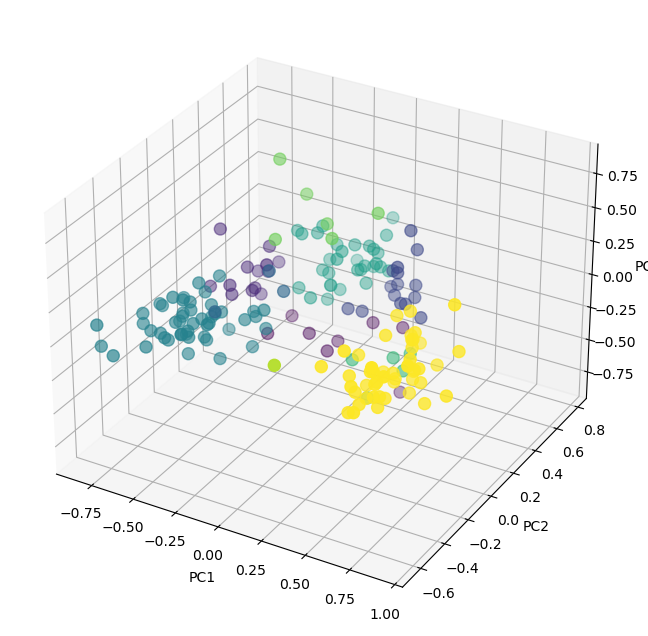

In [42]:
# Create 3D scatterplot of the labelled data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(df_pc_labelled.PC1, df_pc_labelled.PC2, df_pc_labelled.PC3, c=df_pc_labelled.clabel, cmap="viridis", s=75)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [43]:
# getting the Fowlkes-Mallows score
pred_label = np.array(clabel).reshape(-1)
fms = fowlkes_mallows_score(true_label, pred_label)
print(f"The Fowlkes Mallows Score is {fms}")

The Fowlkes Mallows Score is 0.7078503334348512


The low score indicates that there has been a lot of misclustering

### KMeans Clustering

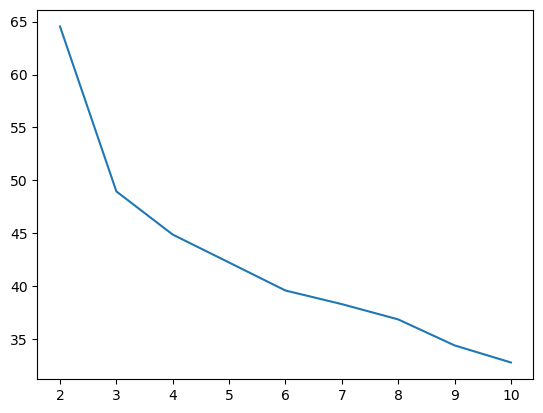

In [44]:
# Using Elbow method to determine optimal number of clusters
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(list(range(2,11)), wcss)

The elbow is at 3

In [45]:
# finding the optimal number of clusters using silhouette score
for i in range(2, 11):
    agg = KMeans(n_clusters=i)
    agg.fit(df_pc)
    clabel = agg.labels_
    print(f"For {i} clusters, Silhouette Score is {silhouette_score(df_pc, clabel)}")

For 2 clusters, Silhouette Score is 0.4323518936290522
For 3 clusters, Silhouette Score is 0.47796626568347655
For 4 clusters, Silhouette Score is 0.43473483093763154
For 5 clusters, Silhouette Score is 0.40351711559970205
For 6 clusters, Silhouette Score is 0.38390129535472084
For 7 clusters, Silhouette Score is 0.35123919977057994
For 8 clusters, Silhouette Score is 0.2638610307160944
For 9 clusters, Silhouette Score is 0.28805640707346375
For 10 clusters, Silhouette Score is 0.28442372048126524


3 clusters has the best silhouette score

In [46]:
# fitting the model
kmeans = KMeans(n_clusters=3)
clabel = pd.DataFrame(kmeans.fit_predict(df_pc), columns = ['clabel'])
df_pc_labelled = pd.concat([df_pc, clabel], axis = 1)

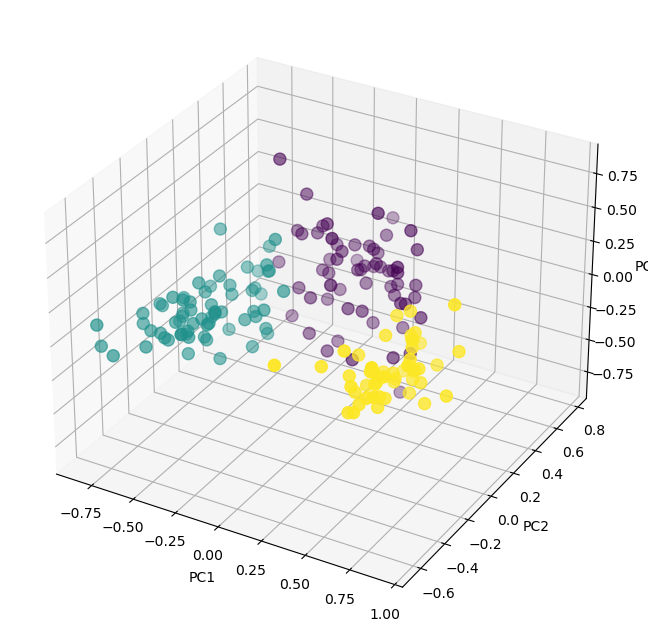

In [47]:
# Create 3D scatterplot of the labelled data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(df_pc_labelled.PC1, df_pc_labelled.PC2, df_pc_labelled.PC3, c=df_pc_labelled.clabel, cmap="viridis", s=75)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [48]:
# getting the Fowlkes-Mallows score
pred_label = np.array(clabel).reshape(-1)
fms = fowlkes_mallows_score(true_label, pred_label)
print(f"The Fowlkes Mallows Score is {fms}")

The Fowlkes Mallows Score is 0.8984161365917068


The high score indicate that there have been very few misclusterings from the original labels

## KMeans Clustering gives the closest clustering to the original labels for 3 cluster on standardized data using the Fowlkes-Mallows score (geometric mean of the pairwise precision and recall) of 92% considering that our 3 principle components account for 67% of the variance in the data